In [ ]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn. metrics import r2_score, mean_squared_error

In [ ]:
# Loading Dataset
df = pd.read_csv('/content/HousingData.csv')

In [ ]:
# Displaying First Few Rows
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
# Checking Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
# Checking For Missing Values
df.isnull().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [ ]:
# Filling Missing Values with Column Means
for column in ['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']:
  df[column].fillna(df[column].mean(), inplace=True)

/tmp/ipython-input-3077069043.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


In [ ]:
# Confirming no Missing Values remain
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


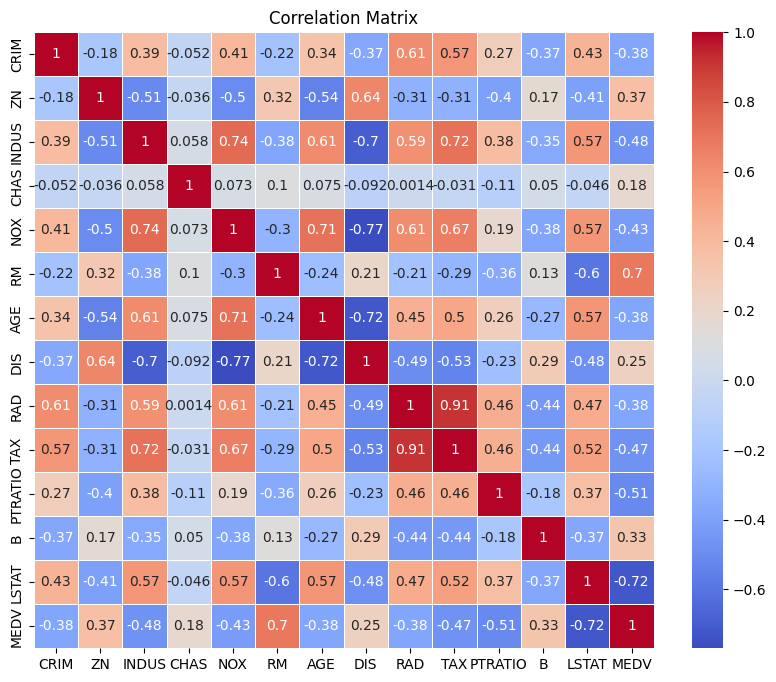

In [ ]:
# Visualizing the Data
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

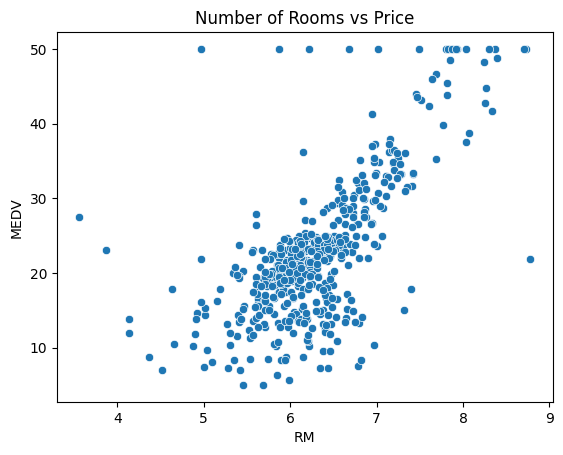

In [ ]:
sns.scatterplot(x='RM', y='MEDV', data=df)
plt.title('Number of Rooms vs Price')
plt.show()

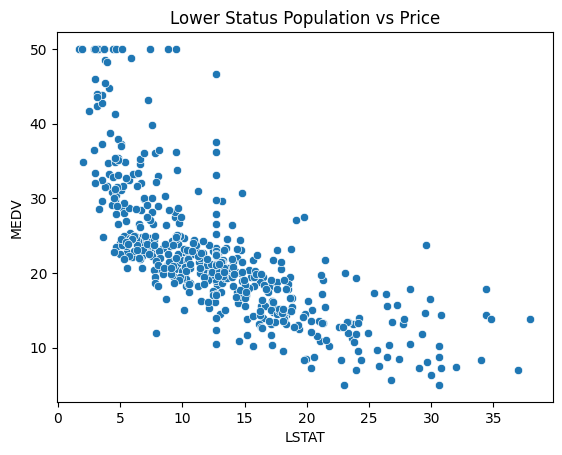

In [ ]:
sns.scatterplot(x='LSTAT', y='MEDV', data=df)
plt.title('Lower Status Population vs Price')
plt.show()

In [ ]:
# Defining Independent Variables (Features)
X = df.drop('MEDV', axis=1)

In [ ]:
# Defining Dependent Variable (Target)
y = df['MEDV']

In [ ]:
# 80% Training, 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initializing and Training Model (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicting Prices
y_pred = model.predict(X_test)

In [ ]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Mean Squared Error:", round(mse, 2))
print("R² Score:", round(r2, 2))

Mean Squared Error: 25.02
R² Score: 0.66


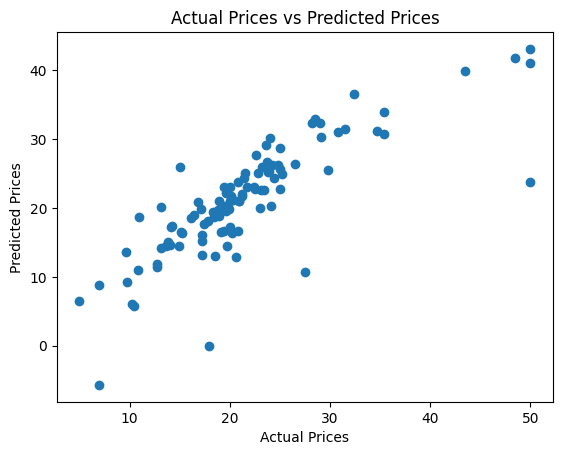

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [ ]:
# Initializing and Training Model (Random Forest)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predicting Prices
y_pred = model.predict(X_test)

In [ ]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Mean Squared Error:", round(mse, 2))
print("R² Score:", round(r2, 2))

Mean Squared Error: 8.23
R² Score: 0.89


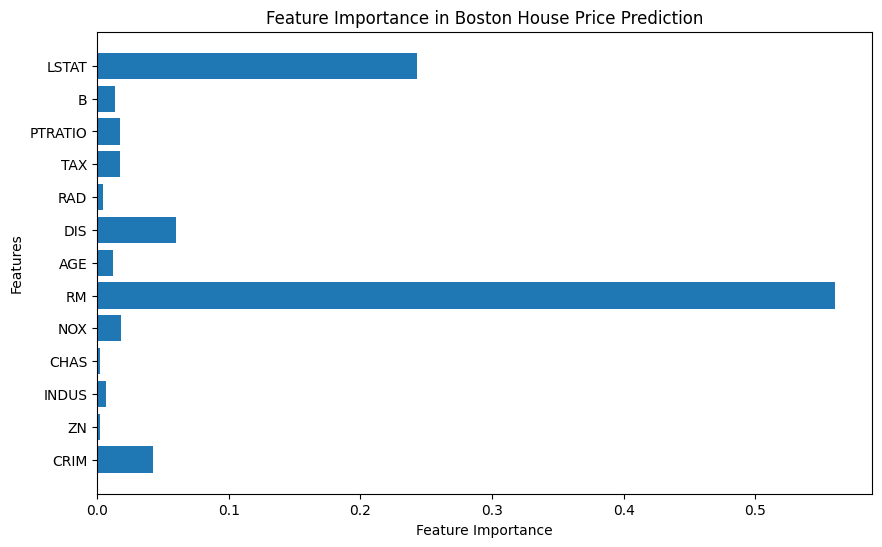

In [ ]:
feature_names = X.columns
feature_importances = model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Boston House Price Prediction')
plt.show()

In [ ]:
# Predicting House Price (User Input)
print("\nEnter values for prediction:")
features = X.columns.tolist()
user_input = {}
for col in features:
    val = float(input(f"Enter {col}: "))
    user_input[col] = [val]
user_input_df = pd.DataFrame(user_input)
predicted_price = model.predict(user_input_df)[0]
print("\nPredicted House Price is: ${:,.2f}".format(predicted_price * 1000))


Enter values for prediction:
Enter CRIM: 0.10
Enter ZN: 0.00
Enter INDUS: 5.00
Enter CHAS: 0
Enter NOX: 0.50
Enter RM: 6.00
Enter AGE: 50.00
Enter DIS: 4.00
Enter RAD: 11
Enter TAX: 300
Enter PTRATIO: 18.00
Enter B: 400.00
Enter LSTAT: 12.00

Predicted House Price is: $21,153.00
